In [1]:
import numpy as np
import pandas as pd
import missingno as msno
data_train = pd.read_csv('claim_data_v2_train.csv')
data_train.sample(3)

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
3945,KS,Kansas,668.902273,High School or Below,12/15/2018,Employed,M,56980,Suburban,Married,...,33,70,Hail,Agent,Two-Door Car,Midsize,Chevrolet,44612.0,N,4946
398,OK,Oklahoma,1377.097618,High School or Below,12/01/2018,Employed,F,59207,Suburban,Single,...,23,21,Collision,Agent,Four-Door Car,Midsize,Chevrolet,41963.0,N,1399
41,IA,Iowa,277.104503,College,12/01/2018,Employed,F,50071,Rural,Single,...,3,32,Hail,Agent,Two-Door Car,Midsize,Chevrolet,425.0,N,1042


In [2]:
def visualize_cat(attr, df=data_train):
    df_i = df[['Survived', attr]].groupby([attr])['Survived'].agg(['count','sum', 'mean'])
    m = 'Pct Survived'
    df_i = df_i.rename({'count': 'frequency', 'sum': 'Survivers', 'mean': m}, axis='columns')
    print(df_i)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    df_i['frequency'].plot.bar(ax=ax1, alpha=.8)
    df_i[m].plot.line(ax=ax2, color='k')
    ax1.set_ylabel('frequency')
    ax2.set_ylabel('Pct Survived')
    ax2.set_ylim(bottom=0, top=1, auto=False)
    ax2.legend()

In [5]:
data_train["Fraudulent_Claim"].describe()

count     5001
unique       2
top          N
freq      4694
Name: Fraudulent_Claim, dtype: object

In [6]:
data_train.columns

Index(['State_Code', 'State', 'Claim_Amount', 'Education', 'Claim_Date',
       'Employment_Status', 'Gender', 'Income', 'Location', 'Marital_Status',
       'Monthly_Premium', 'Annual_Premium', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Claim_Cause', 'Claim_Report_Type',
       'Vehicle_Class', 'Vehicle_Size', 'Vehicle_Model', 'Outstanding_Balance',
       'Fraudulent_Claim', 'Claimant__Number'],
      dtype='object')

In [7]:
data_train.describe(include='all')

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
count,5001,5001,5001.000000,4990,5001,5001,5001,5.001000e+03,4998,5001,...,5001.000000,5001.000000,5001,5001,5001,5001,5001,4992.000000,5001,5001.000000
unique,5,5,NaN,5,3,5,2,NaN,3,3,...,NaN,NaN,5,4,6,3,4,NaN,2,NaN
top,IA,Iowa,NaN,College,12/15/2018,Employed,M,NaN,Suburban,Married,...,NaN,NaN,Collision,Agent,Four-Door Car,Midsize,Toyota,NaN,N,NaN
freq,1546,1546,NaN,1492,2000,3126,2531,NaN,3156,2930,...,NaN,NaN,2077,1889,2535,3523,1278,NaN,4694,NaN
mean,NaN,NaN,787.763253,NaN,NaN,NaN,NaN,4.131045e+04,NaN,NaN,...,15.004199,48.234953,NaN,NaN,NaN,NaN,NaN,23728.152644,NaN,3501.000000
std,NaN,NaN,655.963269,NaN,NaN,NaN,NaN,2.276904e+05,NaN,NaN,...,11.139649,28.096651,NaN,NaN,NaN,NaN,NaN,13827.401917,NaN,1443.808678
min,NaN,NaN,189.868369,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,1001.000000
25%,NaN,NaN,402.296353,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,5.000000,24.000000,NaN,NaN,NaN,NaN,NaN,11528.750000,NaN,2251.000000
50%,NaN,NaN,577.390039,NaN,NaN,NaN,NaN,3.464000e+04,NaN,NaN,...,13.000000,48.000000,NaN,NaN,NaN,NaN,NaN,23993.500000,NaN,3501.000000
75%,NaN,NaN,886.114954,NaN,NaN,NaN,NaN,6.300900e+04,NaN,NaN,...,23.000000,72.000000,NaN,NaN,NaN,NaN,NaN,35574.000000,NaN,4751.000000


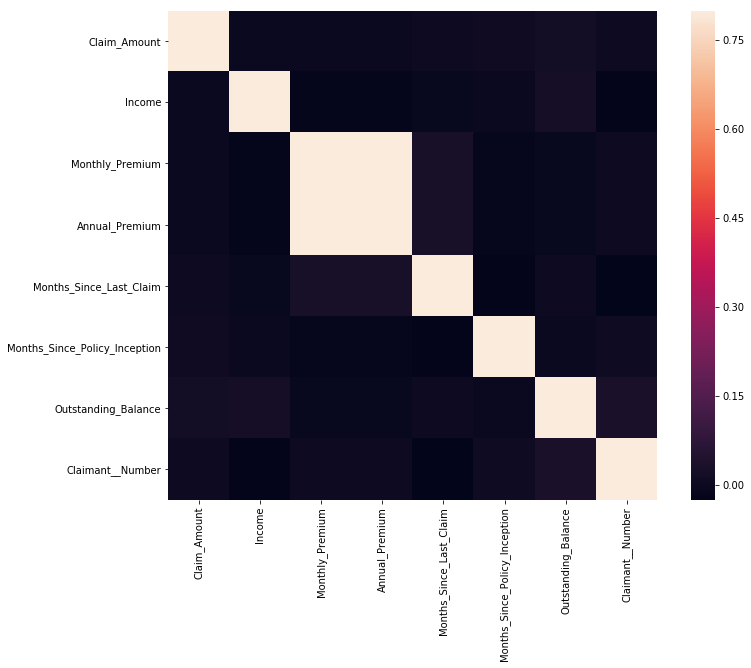

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat= data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

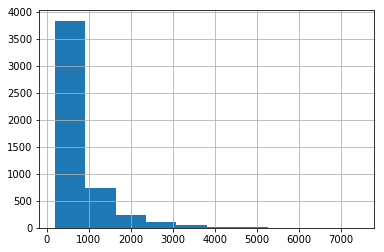

In [11]:
#potential log tranformation
data_train['Claim_Amount'].hist()

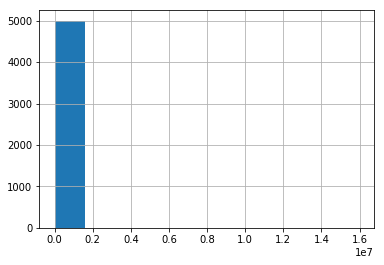

In [15]:
data_train['Income'].describe()
data_train['Income'].hist()

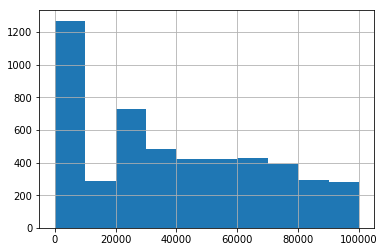

In [22]:
data=data_train['Income'].where(data_train['Income']<=100000,other=100001)
data.hist()

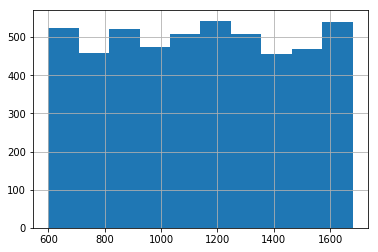

In [16]:
data_train['Annual_Premium'].hist()

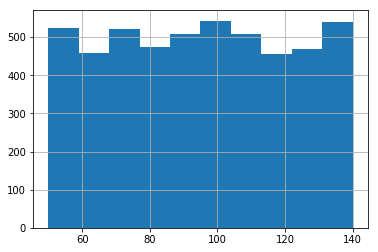

In [17]:
data_train['Monthly_Premium'].hist()

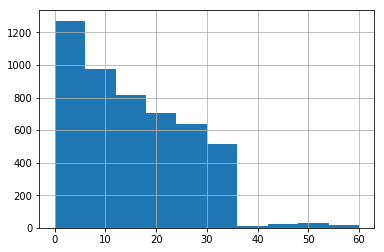

In [18]:
data_train['Months_Since_Last_Claim'].hist()

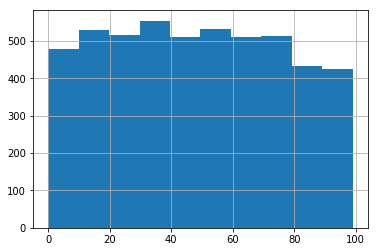

In [19]:
data_train['Months_Since_Policy_Inception'].hist()

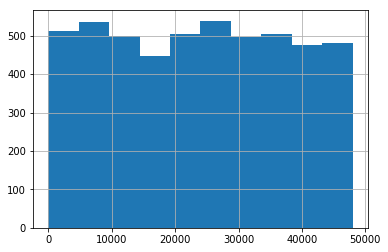

In [24]:
data_train['Outstanding_Balance'].hist()

In [25]:
data_train.isna().sum()

State_Code                        0
State                             0
Claim_Amount                      0
Education                        11
Claim_Date                        0
Employment_Status                 0
Gender                            0
Income                            0
Location                          3
Marital_Status                    0
Monthly_Premium                   0
Annual_Premium                    0
Months_Since_Last_Claim           0
Months_Since_Policy_Inception     0
Claim_Cause                       0
Claim_Report_Type                 0
Vehicle_Class                     0
Vehicle_Size                      0
Vehicle_Model                     0
Outstanding_Balance               9
Fraudulent_Claim                  0
Claimant__Number                  0
dtype: int64

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


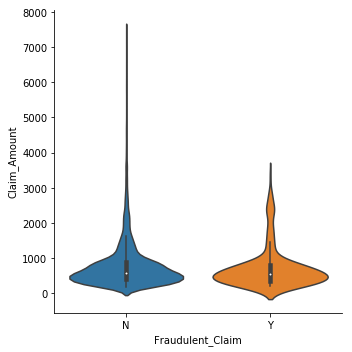

In [30]:
sns.catplot(x="Fraudulent_Claim", y="Claim_Amount", kind="violin",data=data_train);

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


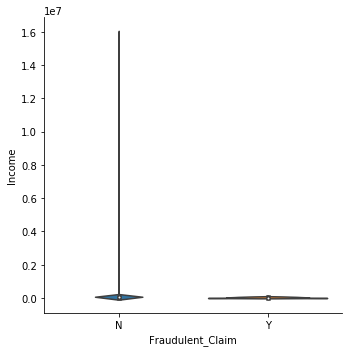

In [31]:
sns.catplot(x="Fraudulent_Claim", y="Income", kind="violin",data=data_train);